In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/synchronous-machine-dataset/SynchronousMachine.csv


**Context**

A synchronous electric motor is an AC electric motor in which, at steady state, the rotation of the shaft is synchronized with the frequency of the supply current; the rotation period is exactly equal to an integral number of AC cycles. Synchronous motors contain multiphase AC electromagnets on the stator of the motor that create a magnetic field which rotates in time with the oscillations of the line current. The rotor with permanent magnets or electromagnets turns in step with the stator field at the same rate and as a result, provides the second synchronized rotating magnet field of any AC motor. A synchronous motor is termed doubly fed if it is supplied with independently excited multiphase AC electromagnets on both the rotor and stator.

Synchronous motors are AC motors with constant speed. This Synchronous Machine dataset is obtained from a real experimental set. The task is to create strong models to estimate the excitation current of the Synchronous Machine.

**Attribute Information**
1) I_y: Load Current
2) PF: Power factor
3) e_PF: Power factor error
4) d_if: Changing of excitation current of synchronous machine
5) I_f: Excitation current of synchronous machine



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor

In [3]:
df=pd.read_csv('../input/synchronous-machine-dataset/SynchronousMachine.csv')
df.rename(columns = {'I_y':'Load Current', 'PF':'Power Factor',
                              'e_PF':'Power Factor Error','d_if':'Excitation Current Change','I_f':'Excitation Current'}, inplace = True)
df.head()

,Load Current,Power Factor,Power Factor Error,Excitation Current Change,Excitation Current
0,3.0,0.66,0.34,0.383,1.563
1,3.0,0.68,0.32,0.372,1.552
2,3.0,0.70,0.30,0.360,1.540
3,3.0,0.72,0.28,0.338,1.518
4,3.0,0.74,0.26,0.317,1.497


In [4]:
def describe(df):                        # Function to explore major elements in a Dataset
                                         # Will help to find null values present and deal with them
  columns=df.columns.to_list()           # Function will help to directly find numerical and categorical columns
  ncol=df.describe().columns.to_list()
  ccol=[]
  for i in columns:
    if(ncol.count(i)==0):
      ccol.append(i)
    else:
      continue
  print('Name of all columns in the dataframe:')
  print(columns)
  print('')
  print('Number of columns in the dataframe:')
  print(len(columns))
  print('')
  print('Name of all numerical columns in the dataframe:')
  print(ncol)
  print('')
  print('Number of numerical columns in the dataframe:')
  print(len(ncol))
  print('')
  print('Name of all categorical columns in the dataframe:')
  print(ccol)
  print('')
  print('Number of categorical columns in the dataframe:')
  print(len(ccol))
  print('')
  print('------------------------------------------------------------------------------------------------')
  print('')
  print('Number of Null Values in Each Column:')
  print('')
  print(df.isnull().sum())
  print('')
  print('')
  print('Number of Unique Values in Each Column:')
  print('')
  print(df.nunique())
  print('')
  print('')
  print('Basic Statistics and Measures for Numerical Columns:')
  print('')
  print(df.describe().T)
  print('')
  print('')
  print('Other Relevant Metadata Regarding the Dataframe:')
  print('')
  print(df.info())
  print('')
  print('')

In [5]:
describe(df)

Name of all columns in the dataframe:
['Load Current', 'Power Factor', 'Power Factor Error', 'Excitation Current Change', 'Excitation Current']

Number of columns in the dataframe:
5

Name of all numerical columns in the dataframe:
['Load Current', 'Power Factor', 'Power Factor Error', 'Excitation Current Change', 'Excitation Current']

Number of numerical columns in the dataframe:
5

Name of all categorical columns in the dataframe:
[]

Number of categorical columns in the dataframe:
0

------------------------------------------------------------------------------------------------

Number of Null Values in Each Column:

Load Current                 0
Power Factor                 0
Power Factor Error           0
Excitation Current Change    0
Excitation Current           0
dtype: int64


Number of Unique Values in Each Column:

Load Current                  31
Power Factor                  36
Power Factor Error            36
Excitation Current Change    306
Excitation Current         

In [6]:
import warnings
warnings.filterwarnings("ignore")
# We are creating 3 categories for better vizualisation
# Split was chosen after Personal research and is subject to change 

df['Load Current Range']=0
for i in range(0,len(df)):
  if(df['Load Current'][i]>5):
    df['Load Current Range'][i]='High'
  elif(df['Load Current'][i]<4):
    df['Load Current Range'][i]='Low'
  else:
    df['Load Current Range'][i]='Fair'

    

<Figure size 432x288 with 0 Axes>

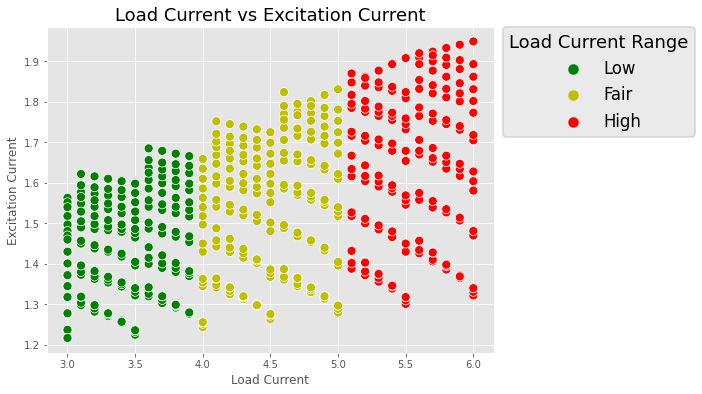

In [7]:
oe=['g','y','r']
plt.tight_layout()
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_context('talk')
plt.title('Load Current vs Excitation Current')
sns.scatterplot( x="Load Current",y='Excitation Current', hue="Load Current Range",data=df,palette=oe)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Load Current Range')

<Figure size 432x288 with 0 Axes>

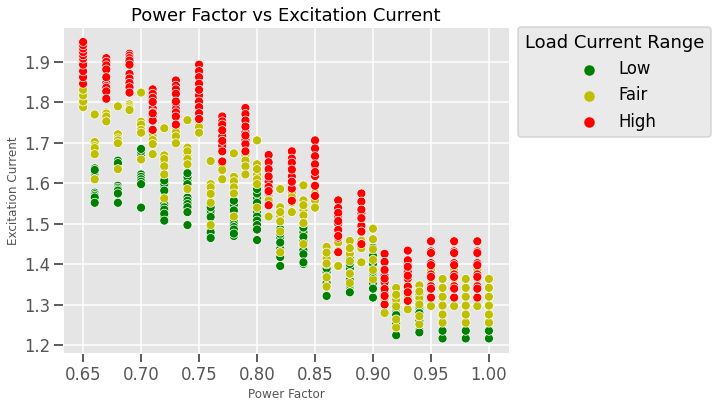

In [8]:
oe=['g','y','r']
plt.tight_layout()
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_context('talk')
plt.title('Power Factor vs Excitation Current')
sns.scatterplot( x="Power Factor",y='Excitation Current', hue="Load Current Range",data=df,palette=oe)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Load Current Range')

<Figure size 432x288 with 0 Axes>

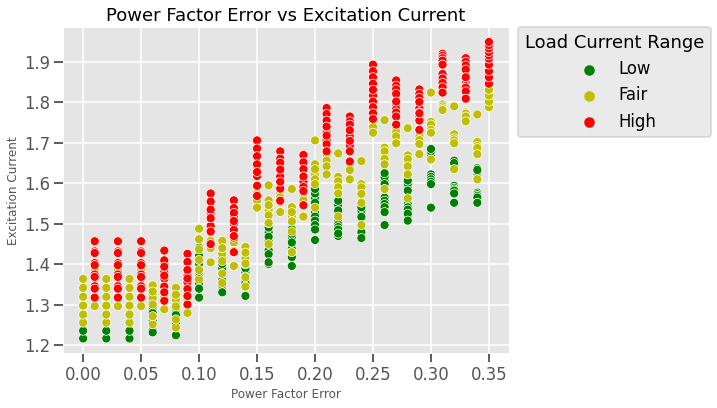

In [9]:
oe=['g','y','r']
plt.tight_layout()
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_context('talk')
plt.title('Power Factor Error vs Excitation Current')
sns.scatterplot( x="Power Factor Error",y='Excitation Current', hue="Load Current Range",data=df,palette=oe)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Load Current Range')

<Figure size 432x288 with 0 Axes>

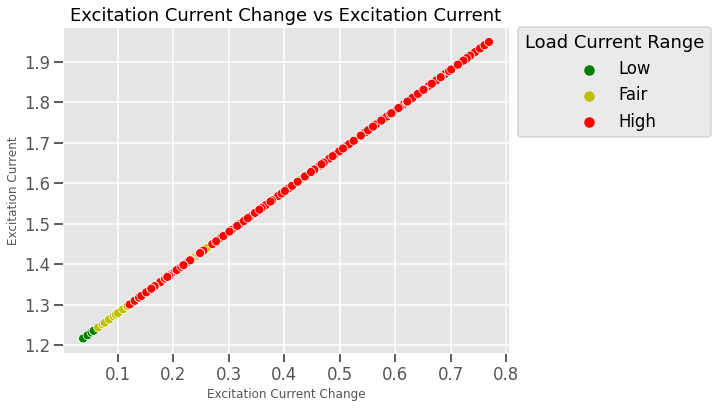

In [10]:
oe=['g','y','r']
plt.tight_layout()
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_context('talk')
plt.title('Excitation Current Change vs Excitation Current')
sns.scatterplot( x="Excitation Current Change",y='Excitation Current', hue="Load Current Range",data=df,palette=oe)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Load Current Range')

In [11]:
import statsmodels.formula.api as sm

from statsmodels.api import OLS
reg=OLS(df['Excitation Current'],df['Load Current'] ).fit()
print(reg.summary())
print('')
print('')
reg=OLS(df['Excitation Current'],df['Power Factor'] ).fit()
print(reg.summary())
print('')
print('')
reg=OLS(df['Excitation Current'],df['Power Factor Error'] ).fit()
print(reg.summary())
print('')
print('')
reg=OLS(df['Excitation Current'],df['Excitation Current Change'] ).fit()
print(reg.summary())
print('')
print('')


                                 OLS Regression Results                                
Dep. Variable:     Excitation Current   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                          1.668e+04
Date:                Tue, 01 Nov 2022   Prob (F-statistic):                        0.00
Time:                        09:26:23   Log-Likelihood:                         -74.876
No. Observations:                 557   AIC:                                      151.8
Df Residuals:                     556   BIC:                                      156.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

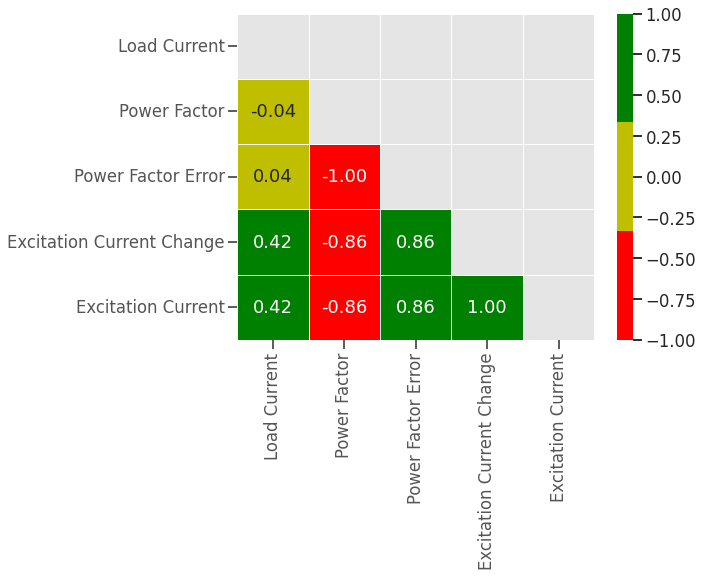

In [12]:
corr = df.corr()
oe=['r','y','g']
fig, ax = plt.subplots(figsize=(8, 6))
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.set_style("white")
sns.heatmap(corr, cmap=oe, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [13]:
def outliers(df_column):
  oe=['r','y','g']
  q75, q25 = np.percentile(df_column, [75 ,25]) 
  iqr = q75 - q25
  print('q75: ',q75)
  print('q25: ',q25)
  print('Inter Quartile Range: ',round(iqr,2))
  print('Outliers lie before', q25-1.8*iqr, 'and beyond', q75+1.8*iqr) 

  # Usually 1.5 times IQR is considered, but we have used 1.8 for broader range since datapoints are very less

  print('Number of Rows with Left Extreme Outliers:', len(df[df_column <q25-1.8*iqr]))
  print('Number of Rows with Right Extreme Outliers:', len(df[df_column>q75+1.8*iqr]))
  fig, ax = plt.subplots(figsize=(8, 6))
  plt.tight_layout()
  plt.style.use('ggplot')
  sns.set_context('talk')
  sns.histplot(data=df, x=df_column, hue="Load Current Range",multiple="stack",palette=oe)
  sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title='Load Current Range', frameon=False)
  print('')
  


q75:  5.3
q25:  3.7
Inter Quartile Range:  1.6
Outliers lie before 0.8200000000000007 and beyond 8.18
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0



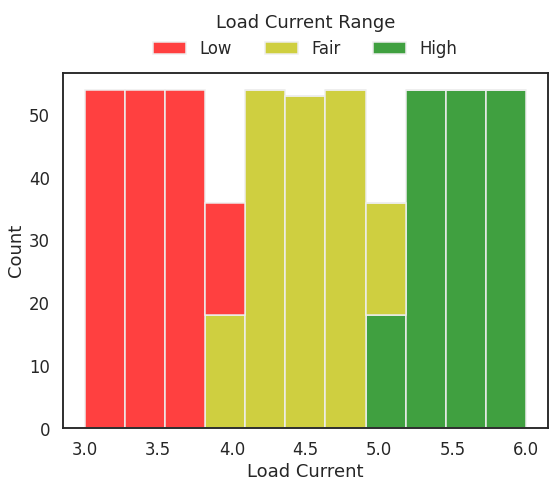

In [14]:
outliers(df['Load Current'])

q75:  0.92
q25:  0.74
Inter Quartile Range:  0.18
Outliers lie before 0.41599999999999987 and beyond 1.2440000000000002
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0



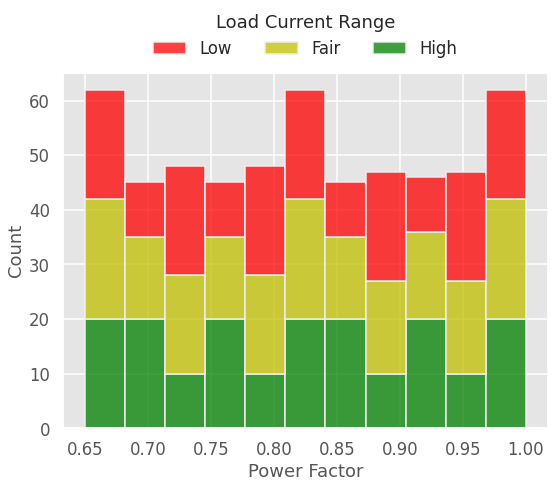

In [15]:
outliers(df['Power Factor'])

q75:  0.26
q25:  0.08
Inter Quartile Range:  0.18
Outliers lie before -0.244 and beyond 0.5840000000000001
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0



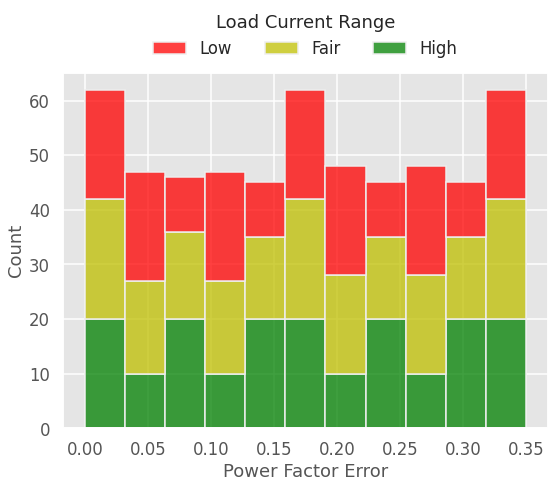

In [16]:
outliers(df['Power Factor Error'])

q75:  0.486
q25:  0.189
Inter Quartile Range:  0.3
Outliers lie before -0.34559999999999996 and beyond 1.0206
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0



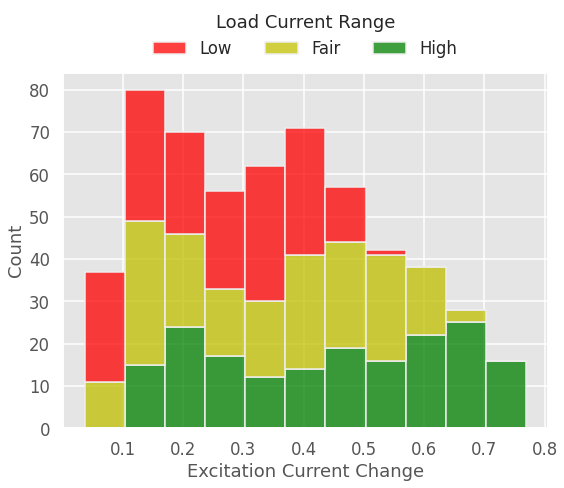

In [17]:
outliers(df['Excitation Current Change'])

In [18]:
vif = df.copy()
vif.drop(columns=['Excitation Current','Load Current Range'],axis=1,inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = vif.columns
vif_data["VIF"] = [variance_inflation_factor(vif.values, i)
                          for i in range(len(vif.columns))]

In [19]:
vif_data

,feature,VIF
0,Load Current,2.422514
1,Power Factor,33.038855
2,Power Factor Error,21.168319
3,Excitation Current Change,9.349596


In [20]:
# Scale Data For Higher Efficiency
from sklearn.preprocessing import StandardScaler # Converts Columnar Data into Standard Normal Distribution
scaler=StandardScaler()
scaler.fit(vif)
scaled_data=scaler.transform(vif)
scaled_data

array([[-1.67536583, -1.59195683,  1.59195683,  0.17927073],
       [-1.67536583, -1.39933818,  1.39933818,  0.11829639],
       [-1.67536583, -1.20671953,  1.20671953,  0.05177893],
       ...,
       [ 1.67576692,  1.20101359, -1.20101359, -1.05684546],
       [ 1.67576692,  1.39363224, -1.39363224, -1.05684546],
       [ 1.67576692,  1.58625089, -1.58625089, -1.05684546]])

In [21]:
from sklearn.decomposition import PCA # Reduce Dimensions by Principal Component Analysis To Compensate for Variables with High VIF
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
x_pca

array([[ 1.66616981,  2.22773971],
       [ 1.41100071,  2.15425755],
       [ 1.15269745,  2.0818543 ],
       ...,
       [-1.71437613, -1.88407492],
       [-1.93506951, -1.96942498],
       [-2.15576289, -2.05477504]])

In [22]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 682.5 kB/s eta 0:00:00


In [23]:
#Linear Regression
import math
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['Excitation Current'], test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(x_train, y_train)
print('Test Accuracy of Linear Regression: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of Linear Regression:',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
mse = round(np.sqrt(mean_squared_error(y_test,y_pred)),4)
print('Mean Squared Error (MSE): ',mse)
print('R- Squared (R-square): ',r2_score(y_test,y_pred))
print('Root Mean Squared Error (RMSE): ',math.sqrt(mse))
print('Mean Absolute error (MAE): ',mae(y_test,y_pred))

y_test_data = pd.DataFrame(y_test)
writer = pd.ExcelWriter("y-test-lr.xlsx", engine='xlsxwriter')
y_test_data.to_excel(writer,sheet_name = "sheet1_actual_data", index=False)
writer.save()

y_pred_data = pd.DataFrame(y_pred)
writer = pd.ExcelWriter("y_pred_lr.xlsx", engine='xlsxwriter')
y_pred_data.to_excel(writer,sheet_name = "sheet1_actual_data", index=False)
writer.save()

Test Accuracy of Linear Regression:  95.49 %

Train Accuracy of Linear Regression: 95.51 %

Mean Squared Error (MSE):  0.0389
R- Squared (R-square):  0.9549203038343468
Root Mean Squared Error (RMSE):  0.19723082923316018
Mean Absolute error (MAE):  0.030131436845810513


In [24]:
#Lasso Regression

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['Excitation Current'], test_size=0.2, random_state=27)
reg=Lasso(alpha=0.010)
reg.fit(x_train, y_train)
print('Test Accuracy of Lasso Regression: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of Lasso Regression:',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
mse = round(np.sqrt(mean_squared_error(y_test,y_pred)),4)
print('Mean Squared Error (MSE): ',mse)
print('R- Squared (R-square): ',r2_score(y_test,y_pred))
print('Root Mean Squared Error (RMSE): ',math.sqrt(mse))
print('Mean Absolute error (MAE): ',mae(y_test,y_pred))

y_pred_data = pd.DataFrame(y_pred)
writer = pd.ExcelWriter("y_pred_lasso.xlsx", engine='xlsxwriter')
y_pred_data.to_excel(writer,sheet_name = "sheet1_actual_data", index=False)
writer.save()

Test Accuracy of Lasso Regression:  95.8 %

Train Accuracy of Lasso Regression: 94.98 %

Mean Squared Error (MSE):  0.0355
R- Squared (R-square):  0.9579712662992081
Root Mean Squared Error (RMSE):  0.18841443681416772
Mean Absolute error (MAE):  0.028334060652160424


In [25]:
#Ridge Regression

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['Excitation Current'], test_size=0.2, random_state=27)
reg=Ridge(alpha=0.002)
reg.fit(x_train, y_train)
print('Test Accuracy of Ridge Regression: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of Ridge Regression:',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
mse = round(np.sqrt(mean_squared_error(y_test,y_pred)),4)
print('Mean Squared Error (MSE): ',mse)
print('R- Squared (R-square): ',r2_score(y_test,y_pred))
print('Root Mean Squared Error (RMSE): ',math.sqrt(mse))
print('Mean Absolute error (MAE): ',mae(y_test,y_pred))

y_pred_data = pd.DataFrame(y_pred)
writer = pd.ExcelWriter("y_pred_ridge.xlsx", engine='xlsxwriter')
y_pred_data.to_excel(writer,sheet_name = "sheet1_actual_data", index=False)
writer.save()

Test Accuracy of Ridge Regression:  96.12 %

Train Accuracy of Ridge Regression: 95.36 %

Mean Squared Error (MSE):  0.0341
R- Squared (R-square):  0.9612083838560391
Root Mean Squared Error (RMSE):  0.18466185312619388
Mean Absolute error (MAE):  0.027128782078745688


In [26]:
from sklearn.linear_model import ElasticNet
elastic_net_model=ElasticNet(max_iter=1000000,tol=0.01)

from sklearn.model_selection import GridSearchCV

#defining various alphas and l1 ratios to check the best parameter
param_grid={'alpha':[0.001,0.1,1,5,7,10,50,75,100,150,200],'l1_ratio':[0.001,0.1,0.2,0.5,0.7,0.99,1]}

grid_model=GridSearchCV(estimator=elastic_net_model,param_grid=param_grid,scoring='neg_root_mean_squared_error',cv=10)

grid_model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=1000000, tol=0.01),
             param_grid={'alpha': [0.001, 0.1, 1, 5, 7, 10, 50, 75, 100, 150,
                                   200],
                         'l1_ratio': [0.001, 0.1, 0.2, 0.5, 0.7, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [27]:
grid_model.best_estimator_

predicted_y=grid_model.predict(x_test)

y_pred_data = pd.DataFrame(predicted_y)
writer = pd.ExcelWriter("y_pred_Grid.xlsx", engine='xlsxwriter')
y_pred_data.to_excel(writer,sheet_name = "sheet1_actual_data", index=False)
writer.save()

RMSE=np.sqrt(mean_squared_error(y_test,predicted_y))

RMSE

0.034080135925818024

In [28]:
#ElacticNet Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['Excitation Current'], test_size=0.2, random_state=27)
reg=ElasticNet(alpha=0.001,l1_ratio=1,max_iter=1000000,tol=0.01)
reg.fit(x_train, y_train)
print('Test Accuracy of ElasticNet Model: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of ElasticNet Model: ',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
mse = round(np.sqrt(mean_squared_error(y_test,y_pred)),4)
print('Mean Squared Error (MSE): ',mse)
print('R- Squared (R-square): ',r2_score(y_test,y_pred))
print('Root Mean Squared Error (RMSE): ',math.sqrt(mse))
print('Mean Absolute error (MAE): ',mae(y_test,y_pred))
y_pred_data = pd.DataFrame(y_pred)
writer = pd.ExcelWriter("y_pred_ElacticNet.xlsx", engine='xlsxwriter')
y_pred_data.to_excel(writer,sheet_name = "sheet1_actual_data", index=False)
writer.save()

Test Accuracy of ElasticNet Model:  96.12 %

Train Accuracy of ElasticNet Model:  95.36 %

Mean Squared Error (MSE):  0.0341
R- Squared (R-square):  0.96121531427612
Root Mean Squared Error (RMSE):  0.18466185312619388
Mean Absolute error (MAE):  0.02716504597039054


In [29]:
#Decision Tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['Excitation Current'], test_size=0.2, random_state=4)
reg=DecisionTreeRegressor()
reg.fit(x_train, y_train)
print('Test Accuracy of DecisionTree Regression: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of DecisionTree Regression:',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
mse = round(np.sqrt(mean_squared_error(y_test,y_pred)),4)
print('Mean Squared Error (MSE): ',mse)
print('R- Squared (R-square): ',r2_score(y_test,y_pred))
print('Root Mean Squared Error (RMSE): ',math.sqrt(mse))
print('Mean Absolute error (MAE): ',mae(y_test,y_pred))

y_pred_data = pd.DataFrame(y_pred)
writer = pd.ExcelWriter("y_pred_Decision.xlsx", engine='xlsxwriter')
y_pred_data.to_excel(writer,sheet_name = "sheet1_actual_data", index=False)
writer.save()

Test Accuracy of DecisionTree Regression:  96.42 %

Train Accuracy of DecisionTree Regression: 100.0 %

Mean Squared Error (MSE):  0.0353
R- Squared (R-square):  0.9642374492362152
Root Mean Squared Error (RMSE):  0.18788294228055935
Mean Absolute error (MAE):  0.027392857142857132


In [30]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 103, stop = 300, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [31]:
#RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['Excitation Current'], test_size=0.2, random_state=4)
reg=RandomForestRegressor(n_estimators=103, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt',max_depth= None, bootstrap= True)
reg.fit(x_train, y_train)
print('Test Accuracy of RandomForestRegressor: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of RandomForestRegressor :',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
mse = round(np.sqrt(mean_squared_error(y_test,y_pred)),4)
print('Mean Squared Error (MSE): ',mse)
print('R- Squared (R-square): ',r2_score(y_test,y_pred))
print('Root Mean Squared Error (RMSE): ',math.sqrt(mse))
print('Mean Absolute error (MAE): ',mae(y_test,y_pred))
y_pred_data = pd.DataFrame(y_pred)
writer = pd.ExcelWriter("y_pred_Random.xlsx", engine='xlsxwriter')
y_pred_data.to_excel(writer,sheet_name = "sheet1_actual_data", index=False)
writer.save()

Test Accuracy of RandomForestRegressor:  97.01 %

Train Accuracy of RandomForestRegressor : 99.54 %

Mean Squared Error (MSE):  0.0323
R- Squared (R-square):  0.97008108371422
Root Mean Squared Error (RMSE):  0.17972200755611428
Mean Absolute error (MAE):  0.0254200762829404
